In [1]:
import os
import numpy as np
from darkflow.net.build import TFNet
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

options = {"model": "cfg/yolo.cfg", 
           "load": "weights/yolo.weights", 
           "threshold": 0.1}

tfnet = TFNet(options)

/home/gagan/.virtualenvs/ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gagan/.virtualenvs/ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gagan/.virtualenvs/ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/gagan/.virtualenvs/ml/lib/python3.6/site-packages/tensorflow/

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading weights/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.054389238357543945s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  | 

In [2]:
predictThresh = 0.5

In [3]:
labelsPath = "cfg/coco.names";

LABELS = None

with open(labelsPath, 'rt') as f:

    LABELS = f.read().rstrip('\n').split('\n')


np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),dtype="uint8")


dict_obj = {}
for label, color in zip(LABELS, COLORS):
    dict_obj[label] = color

print(dict_obj) 

{'person': array([102, 220, 225], dtype=uint8), 'bicycle': array([ 95, 179,  61], dtype=uint8), 'car': array([234, 203,  92], dtype=uint8), 'motorbike': array([  3,  98, 243], dtype=uint8), 'aeroplane': array([ 14, 149, 245], dtype=uint8), 'bus': array([ 46, 106, 244], dtype=uint8), 'train': array([ 99, 187,  71], dtype=uint8), 'truck': array([212, 153, 199], dtype=uint8), 'boat': array([188, 174,  65], dtype=uint8), 'traffic light': array([153,  20,  44], dtype=uint8), 'fire hydrant': array([203, 152, 102], dtype=uint8), 'stop sign': array([214, 240,  39], dtype=uint8), 'parking meter': array([121,  24,  34], dtype=uint8), 'bench': array([114, 210,  65], dtype=uint8), 'bird': array([239,  39, 214], dtype=uint8), 'cat': array([244, 151,  25], dtype=uint8), 'dog': array([ 74, 145, 222], dtype=uint8), 'horse': array([ 14, 202,  85], dtype=uint8), 'sheep': array([145, 117,  87], dtype=uint8), 'cow': array([184, 189, 221], dtype=uint8), 'elephant': array([116, 237, 109], dtype=uint8), 'bea

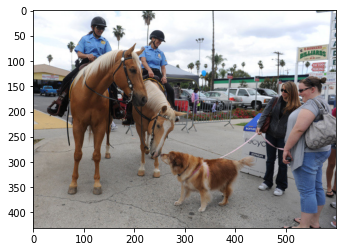

In [4]:
import pprint as pp

original_img = cv2.imread("./sample_img/sample_multiple_objects.jpg")

original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

plt.imshow(original_img)
results = tfnet.return_predict(original_img)



In [5]:
pp.pprint(results)

[{'bottomright': {'x': 157, 'y': 208},
  'confidence': 0.67079693,
  'label': 'person',
  'topleft': {'x': 61, 'y': 3}},
 {'bottomright': {'x': 286, 'y': 258},
  'confidence': 0.32715744,
  'label': 'person',
  'topleft': {'x': 200, 'y': 38}},
 {'bottomright': {'x': 329, 'y': 187},
  'confidence': 0.2517692,
  'label': 'person',
  'topleft': {'x': 317, 'y': 156}},
 {'bottomright': {'x': 371, 'y': 204},
  'confidence': 0.14781988,
  'label': 'person',
  'topleft': {'x': 354, 'y': 183}},
 {'bottomright': {'x': 524, 'y': 373},
  'confidence': 0.7331757,
  'label': 'person',
  'topleft': {'x': 443, 'y': 139}},
 {'bottomright': {'x': 592, 'y': 378},
  'confidence': 0.22580777,
  'label': 'person',
  'topleft': {'x': 561, 'y': 147}},
 {'bottomright': {'x': 594, 'y': 430},
  'confidence': 0.7661935,
  'label': 'person',
  'topleft': {'x': 501, 'y': 135}},
 {'bottomright': {'x': 596, 'y': 430},
  'confidence': 0.14075229,
  'label': 'person',
  'topleft': {'x': 567, 'y': 363}},
 {'bottomright'

In [6]:
def boxing(original_img, predictions):
    newImage = np.copy(original_img)
    for box in predictions:
        # print(box)
        x1,y1,x2,y2 = (box['topleft']['x'],box['topleft']['y'],box['bottomright']['x'],box['bottomright']['y'])
        conf = box['confidence']
        # print(conf)
        label = box['label']
       
        if conf < predictThresh:
            continue
        color = [int(c) for c in dict_obj[label]]
        print("label {}, color {}".format(label,color))
        
        cv2.rectangle(newImage,(x1,y1),(x2,y2),color,6)
        labelSize=cv2.getTextSize(label,cv2.FONT_HERSHEY_COMPLEX,0.5,2)
        
        _x1 = x1
        _y1 = y1
        _x2 = _x1+labelSize[0][0]
        _y2 = y1-int(labelSize[0][1])
        
        cv2.rectangle(newImage,(_x1,_y1),(_x2,_y2),color,cv2.FILLED)
        cv2.putText(newImage,label,(x1,y1),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),1)
    return newImage

label person, color [102, 220, 225]
label person, color [102, 220, 225]
label person, color [102, 220, 225]
label car, color [234, 203, 92]
label car, color [234, 203, 92]
label dog, color [74, 145, 222]
label horse, color [14, 202, 85]
label horse, color [14, 202, 85]
Before saving image:
['images', 'outputTEMP_MPY_wvf_snd.ogg', 'sample_multiple_objects.jpg', 'savedImage.jpg']
After saving image:
['images', 'outputTEMP_MPY_wvf_snd.ogg', 'sample_multiple_objects.jpg', 'savedImage.jpg']


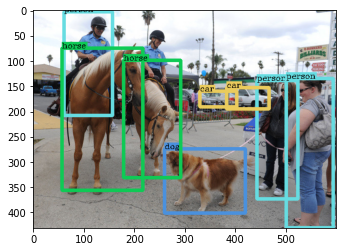

In [7]:
new_image = boxing(original_img,results)
plt.imshow(new_image)

  
# Image directory 
directory = r'/mnt/c/Users/Gagan Aggawal/Desktop/project/ObjectDetection/sample_img'
# List files and directories   
# in 'C:/Users/Rajnish/Desktop/GeeksforGeeks'   


# Change the current directory  
# to specified directory  
os.chdir(directory) 
  
# List files and directories   
# in 'C:\Users\Gagan Aggawal\Desktop\project\ObjectDetection\sample_img'   
print("Before saving image:")   
print(os.listdir(directory))   
  
# Filename 
filename = 'savedImage.jpg'
  
# Using cv2.imwrite() method 
# Saving the image 

cv_image = cv2.cvtColor(new_image, cv2.COLOR_RGB2BGR)
cv2.imwrite(filename, cv_image) 
# List files and directories   
# in 'C:/Users / Rajnish / Desktop / GeeksforGeeks'   
print("After saving image:")   
print(os.listdir(directory))

In [8]:
def get_output(frame):
    frame = np.asarray(frame)
    results = tfnet.return_predict(frame)
    new_frame = boxing(frame, results)
    return new_frame

In [9]:
s

NameError: name 's' is not defined